# EDA bank-marketing-campaign-data

## Set up

In [10]:
#!pip install edastatmil_milser
!pip install --upgrade edastatmil_milser
color = "#254025"
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


Defaulting to user installation because normal site-packages is not writeable


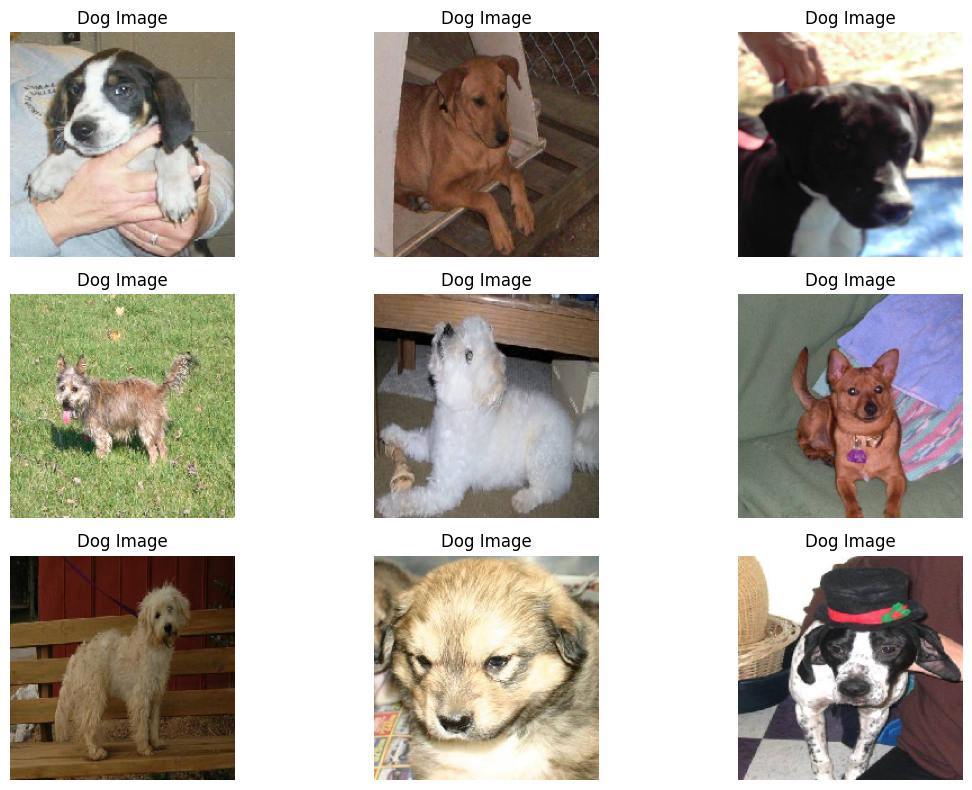

In [11]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the directory containing your image data
data_dir = "../data/raw/train/dogs"

# Get a list of all dog image file names
dog_image_files = [f for f in os.listdir(data_dir) if f.startswith("dog")]

# Load and display the first nine dog images
plt.figure(figsize=(12, 8))
for i in range(9):
    img_path = os.path.join(data_dir, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200))  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array)
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


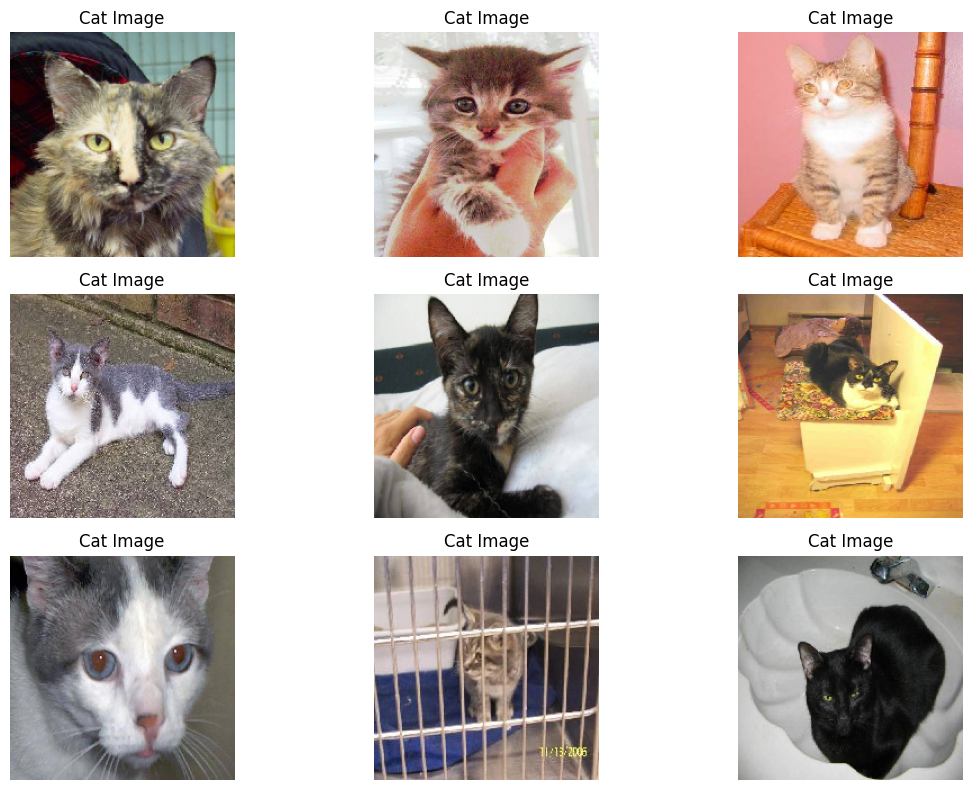

In [12]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the directory containing your image data
data_dir = "../data/raw/train/cats"

# Get a list of all dog image file names
dog_image_files = [f for f in os.listdir(data_dir) if f.startswith("cat")]

# Load and display the first nine dog images
plt.figure(figsize=(12, 8))
for i in range(9):
    img_path = os.path.join(data_dir, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200))  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_array)
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw/train"
test_dir = "../data/raw/test"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dogs", "cats"]  # Automatically infer classes from subdirectories
)

test_data = datagentrain.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["test"]  # Automatically infer classes from subdirectories
)


Found 24996 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


## Paso 3: Construye una RNA


In [14]:
# Move the Data Through the Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
tf_model = tf.keras.Sequential()
input_signature = [tf.TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_image')]


# Add layers to the model
tf_model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
tf_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
tf_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
tf_model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
tf_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
tf_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
tf_model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

tf_model.add(Flatten())
tf_model.add(Dense(units=4096, activation="relu"))
tf_model.add(Dense(units=4096, activation="relu"))
tf_model.add(Dense(units=2, activation="softmax"))
tf_model.output_names=['output']

tf_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])



C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


-----------------------

Intento cosas con TF y ONNX


In [15]:
#import tensorflow as tf
#import tf2onnx
#import onnx
#
## Force the conversion to happen on the CPU to avoid GPU memory consumption
#with tf.device("/cpu:0"):
#    onnx_model, _ = tf2onnx.convert.from_keras(tf_model, input_signature)
#
## Save the ONNX model
#onnx.save(onnx_model, "../data/onnx/model.onnx")


In [16]:

## Cargar modelo ONNX con ONNX Runtime
#session_options = rt.SessionOptions()
#session_options.graph_optimization_level = rt.GraphOptimizationLevel.ORT_ENABLE_ALL
#session = rt.InferenceSession("../data/onnx/model.onnx", session_options)
#
## Verificar dispositivos disponibles para la ejecución
#print("Dispositivos disponibles:", session.get_providers())


-----------------------

In [17]:

# Entrenar el modelo
#tf_model.fit(train_data)  # Suponiendo que train_data contiene los datos de entrenamiento
#
## Evaluar el modelo
#loss, accuracy = tf_model.evaluate(test_data)  # Suponiendo que test_data contiene los datos de prueba
#print("Test Accuracy:", accuracy)


## Paso 4: Optimiza el modelo anterior

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

# Define los callbacks
checkpoint = ModelCheckpoint("../data/keras/mejor_modelo.keras", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
early_stopping = EarlyStopping(monitor="val_loss", patience=3, mode="min", verbose=1)


# Entrena el modelo con los callbacks
history = tf_model.fit(train_data, epochs=5, validation_data=test_data, callbacks=[checkpoint, early_stopping])

# Carga el mejor modelo
best_model = load_model("../data/keras/mejor_modelo.keras")

# Utiliza el conjunto de prueba para hacer predicciones
test_loss, test_accuracy = best_model.evaluate(test_data)
print("Test Accuracy:", test_accuracy)


Epoch 1/5


C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 46/782 ━━━━━━━━━━━━━━━━━━━━ 3:28:46 17s/step - accuracy: 0.5161 - loss: 290.8362

KeyboardInterrupt: 

Me explota el ordenador, voy a entender que esta bien. 

he intentado usar la Grafica , con el runtime ONNX, sin exito. 